# Data Preparation 
- [7-steps-mastering-data-preparation-python](http://www.kdnuggets.com/2017/06/7-steps-mastering-data-preparation-python.html?utm_content=buffere0216&utm_medium=social&utm_source=facebook.com&utm_campaign=buffer)
 - Step 1: Preparing for the Preparation
 - Step 2: Exploratory Data Analysis
 - Step 3: Dealing with Missing Values
 - Step 4: Dealing with Outliers
 - Step 5: Dealing with Imbalanced Data
 - Step 6: Data Transformations
 - Step 7: Finishing Touches & Moving Ahead
 
 

In [171]:
import pymysql
import redis

#redis connection
#r = redis.StrictRedis(host='172.17.0.2', port=6379, db=0)

#connect maria rdb
db = pymysql.connect(
        host='172.17.0.4',
        user='root',
        passwd='1234',
        db='rental',
        charset='utf8mb4'
    )
#設置cursor
cursor = db.cursor()
#cursor.execute('SELECT * FROM typeID;')

In [125]:
import numpy as np
import pandas as pd
import pandas_profiling

cursor.execute('SELECT ID, cityID, pet, rent, space , lat, lng , label, floor FROM rentInfo;')
#dtype_dict = { "rent":np.int32, "space":np.float64, "lat":np.float64, "lng":np.float64}
df = pd.DataFrame(list(cursor.fetchall()),
                 columns = ["ID", "cityID", "pet", "rent", "space", "lat", "lng","label","floor"])
cursor.close()
# df.columns = ["ID", "cityID", "pet", "rent", "space", "lat", "lng","label"]

In [126]:
df.dtypes

ID         int64
cityID     int64
pet       object
rent       int64
space     object
lat       object
lng       object
label     object
floor      int64
dtype: object

In [127]:
df.loc[:,["space", "lat", "lng"]] = df.loc[:,["space", "lat", "lng"]].astype(np.float64)

In [128]:
df.dtypes

ID          int64
cityID      int64
pet        object
rent        int64
space     float64
lat       float64
lng       float64
label      object
floor       int64
dtype: object

In [89]:
pfr = pandas_profiling.ProfileReport(df)
pfr.to_file("/tmp/rentInfo.html")
pfr

Number of variables,9
Number of observations,24799
Total Missing (%),0.0%
Total size in memory,1.7 MiB
Average record size in memory,72.0 B
Numeric,6
Categorical,2
Date,0
Text (Unique),0
Rejected,1
Distinct count,24799


# geo lacation
主要是一些因為過期等因素抓取失敗的  
range:
- lng:[121.29,122.00]  
- lat:[24.68,25.29]  

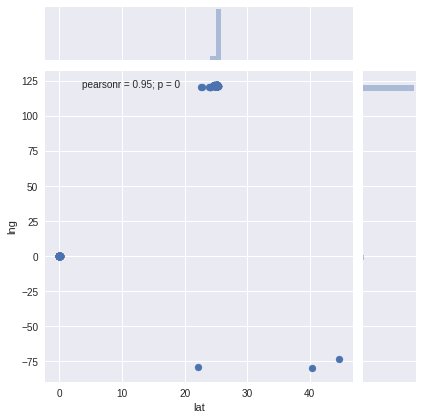

In [129]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
# sns.distplot(y, hist=True)
sns.jointplot(x="lat", y="lng", data=df);

In [130]:
#outline data
print(df.shape)
df = df[df.lng>121]
print(df.shape)
#GeoLocation is ok
print(df[df.lng<122].shape)
print(df[df.lat>24].shape)
print(df[df.lat<26].shape)

(24799, 9)
(24648, 9)
(24648, 9)
(24648, 9)
(24648, 9)


In [72]:
(24799-24648)/24799

0.006088955199806444

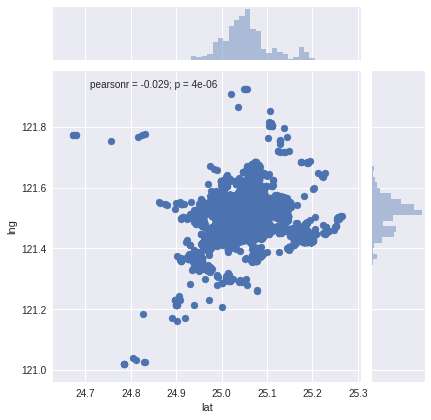

In [132]:
# sns.jointplot(x="lat", y="lng", data=df,
#               ylim=[121.0,122.00], xlim=[24.68,25.29]);
sns.jointplot(x="lat", y="lng", data=df);

# label


In [91]:
df.groupby('label').count().ID

label
NA       48
住      5677
套     18658
雅       416
Name: ID, dtype: int64

In [93]:
df.groupby('label').describe()

ID        cityID         floor           lat  \
label                                                                 
NA    count     48.000000     48.000000     48.000000     48.000000   
      mean    2035.354167    126.291667      0.666667     25.089396   
      std      430.793355     42.815765      1.938779      0.047611   
      min      910.000000    100.000000      0.000000     24.976098   
      25%     1783.000000    111.000000      0.000000     25.051548   
      50%     2177.500000    111.000000      0.000000     25.108386   
      75%     2354.250000    114.000000      1.000000     25.132344   
      max     2567.000000    247.000000     13.000000     25.145312   
住     count   5677.000000   5677.000000   5677.000000   5677.000000   
      mean    4019.146204    163.393870      6.064647     25.063102   
      std     2499.102752    342.148645      4.882071      0.065527   
      min        1.000000    100.000000      0.000000     22.652541   
      25%     1686.000000    106.000000      2.000000     25.031987   
      50%     4083.000000    111.000000      5.000000     25.056493   
      75%     6179.000000    235.000000      9.000000     25.087253   
      max     8532.000000  10491.000000     56.000000     25.260501   
套     count  18658.000000  18658.000000  18658.000000  18658.000000   
      mean   15144.867617    168.257369      5.392218     24.866622   
      std     5970.862167     65.528579      4.268195      2.158397   
      min        4.000000      0.000000     -2.000000      0.000000   
      25%    10806.250000    106.000000      3.000000     25.018587   
      50%    15470.500000    115.000000      4.000000     25.048174   
      75%    20134.750000    236.000000      7.000000     25.077265   
      max    24799.000000    815.000000     40.000000     44.625102   
雅     count    416.000000    416.000000    416.000000    416.000000   
      mean    4856.418269    162.612981      3.641827     25.071403   
      std     2290.380469     64.627695      2.708146      0.752360   
      min      309.000000    100.000000      0.000000     23.894175   
      25%     2956.250000    108.000000      2.000000     25.005859   
      50%     4651.000000    115.500000      3.000000     25.034833   
      75%     7261.500000    231.000000      5.000000     25.067124   
      max     8451.000000    526.000000     31.000000     40.300981   

                      lng          rent         space  
label                                                  
NA    count     48.000000  4.800000e+01     48.000000  
      mean     121.538900  1.177018e+05     97.220000  
      std        0.042541  6.938974e+04     51.017010  
      min      121.375148  8.500000e+03     16.890000  
      25%      121.519848  7.725000e+04     53.710000  
      50%      121.551214  1.000000e+05     95.890000  
      75%      121.563385  1.500000e+05    133.750000  
      max      121.599692  2.800000e+05    242.000000  
住     count   5677.000000  5.677000e+03   5677.000000  
      mean     121.513351  4.535703e+05     38.841818  
      std        0.065477  1.070067e+07    246.998399  
      min      120.284290  0.000000e+00      0.000000  
      25%      121.481443  2.500000e+04      0.000000  
      50%      121.525527  4.000000e+04     30.000000  
      75%      121.547618  6.700000e+04     50.430000  
      max      121.816932  5.000000e+08  18000.000000  
套     count  18658.000000  1.865800e+04  18658.000000  
      mean     120.584232  2.610028e+04     21.717346  
      std       10.644231  3.286765e+04     22.674483  
      min      -78.957017  0.000000e+00      0.000000  
      25%      121.464952  8.500000e+03      7.000000  
      50%      121.519338  1.500000e+04     12.000000  
      75%      121.546637  3.000000e+04     30.000000  
      max      121.925761  6.000000e+05    330.000000  
雅     count    416.000000  4.160000e+02    416.000000  
      mean     121.042991  6.135990e+03      8.739808  
      std        9.856976  3.539906e+03 

# space

In [102]:
df.space.describe()

count    24799.000000
mean        25.565933
std        120.102495
min          0.000000
25%          6.000000
50%         14.870000
75%         36.000000
max      18000.000000
Name: space, dtype: float64

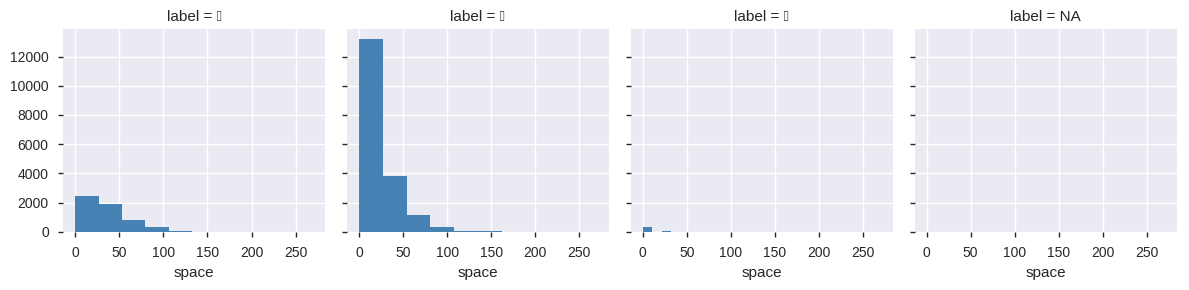

In [105]:
#
g = sns.FacetGrid(df[df.space<300], col="label", margin_titles=True)
g.map(plt.hist, "space", color="steelblue")

In [106]:
df[df.space<0.1].shape

(1804, 9)

In [117]:
for i in range(100,1000,100):
    print(i, df[df.space>i].count().ID)

100 417
200 26
300 8
400 5
500 5
600 4
700 4
800 4
900 4


In [133]:
df = df[df.space>0.1]
df[df.space<0.1].shape

(0, 9)

In [134]:
df = df[df.space<100]
df[df.space>100].shape

(0, 9)

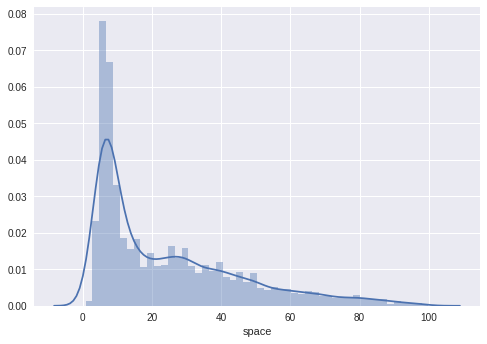

In [135]:
sns.distplot(df[df.space<100].space ,bins=50)

# rent

In [176]:
df.describe(percentiles=[0.05, 0.1, 0.27, 0.73, 0.9, 0.95]).rent

count    2.254000e+04
mean     1.012869e+05
std      4.247737e+06
min      0.000000e+00
5%       5.000000e+03
10%      6.500000e+03
27%      9.500000e+03
50%      1.800000e+04
73%      3.400000e+04
90%      6.500000e+04
95%      8.800000e+04
max      5.000000e+08
Name: rent, dtype: float64

In [232]:
df[df.rent>=130000].shape

(359, 9)

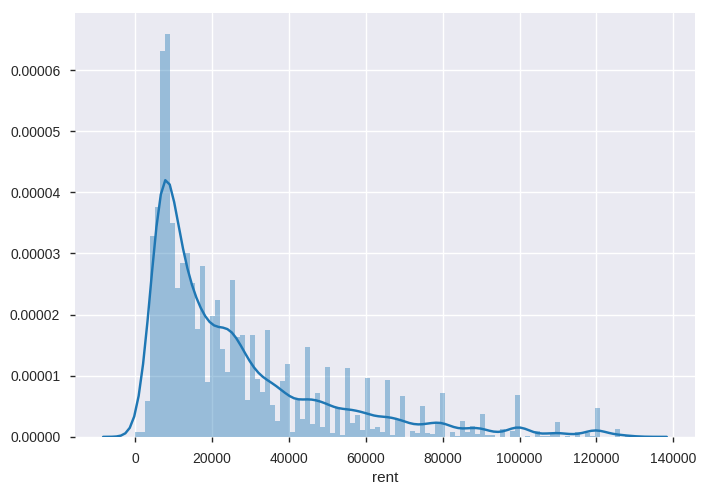

In [231]:
sns.distplot(df[df.rent<130000].rent ,bins=100)

In [136]:
df = df[df.rent<130000]
df[df.rent>=130000].shape

(0, 9)

In [137]:
df = df[df.rent>2000]
df[df.rent<=20000].shape

(12125, 9)

In [138]:
df["rent"].divide(df["space"]).describe()

count    22013.000000
mean      1258.760061
std        604.547835
min         75.075075
25%        875.520000
50%       1174.812030
75%       1557.093426
max      25000.000000
dtype: float64

In [139]:
df['unit'] = df["rent"].divide(df["space"])

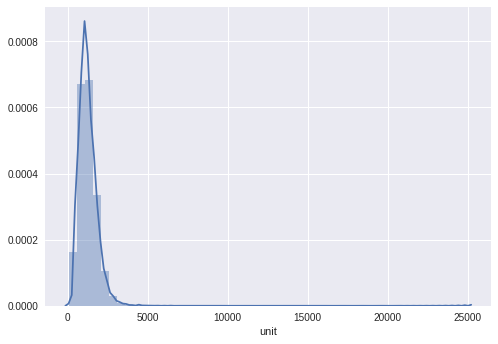

In [140]:
sns.distplot(df.unit)

In [141]:
df = df[df['unit']<3500]
df[df.unit>3500].shape

(0, 10)

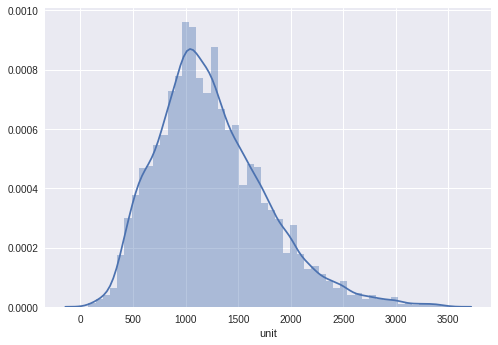

In [170]:
sns.distplot(df.unit.map(lambda x:x))

# pet cityID label

In [309]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [303]:
yn = {'Y':1,'N':0}
df.loc[:,"pet"] = df.loc[:,"pet"].map(lambda x: yn[x])

In [308]:
df.pet.unique()

array([0, 1])

In [310]:
le.fit(df.label)

LabelEncoder()

In [311]:
le.classes_

array(['NA', '住', '套', '雅'], dtype=object)

In [312]:
le.transform(df.label)

array([1, 1, 1, ..., 2, 2, 2])

In [313]:
df["lebal_encoding"] = le.transform(df.label)

In [320]:
df.describe().cityID

count    22053.000000
mean       169.381581
std        182.467790
min        100.000000
25%        106.000000
50%        115.000000
75%        236.000000
max      10491.000000
Name: cityID, dtype: float64

In [143]:
import re
def idfilter(cityID):
    try:
        n = int(cityID)
        digit = n // 100
        if digit//100 < 1:
            return n
        else:
            return digit
    except:
        pass

df['cityID'] = df.cityID.map(idfilter)

In [144]:
df[df.cityID>253].shape

(93, 10)

In [145]:
#new taipei postal code max is 253
df = df[df.cityID<=253]
df[df.cityID>253].shape

(0, 10)

In [146]:
df.head()

,ID,cityID,pet,rent,space,lat,lng,label,floor,unit
0,1,251,N,25000,62.34,25.181837,121.440487,住,5,401.026628
1,2,251,N,32000,50.70,25.197719,121.421685,住,2,631.163708
2,3,251,N,25000,44.97,25.178503,121.454991,住,9,555.926173
3,4,251,N,5000,7.00,25.170918,121.441836,套,4,714.285714
4,5,239,N,6000,7.99,24.974047,121.327134,套,3,750.938673


# floor

In [147]:
df.floor.describe(percentiles=[.95])

count    21821.000000
mean         5.381605
std          4.302246
min         -2.000000
50%          4.000000
95%         14.000000
max         56.000000
Name: floor, dtype: float64

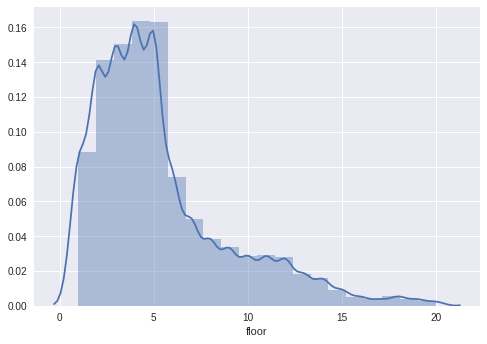

In [153]:
sns.distplot(df.floor, bins=20)

In [149]:
df = df[df.floor<21]
df = df[df.floor>0]

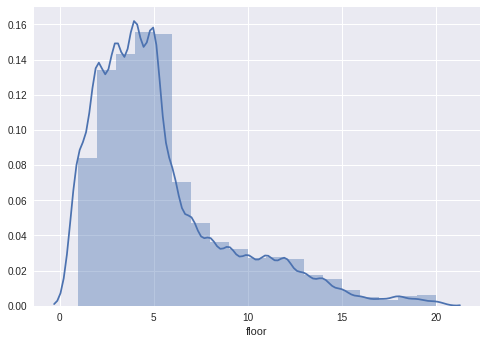

In [150]:
sns.distplot(df.floor, bins=19)

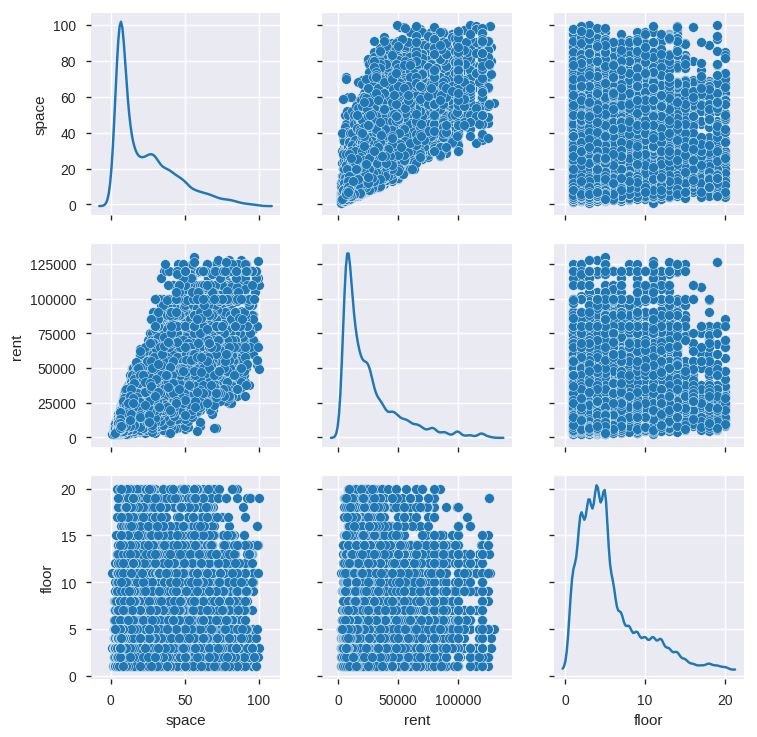

In [382]:
sns.pairplot(df.loc[:,['space', 'rent', 'floor']], diag_kind='kde')

In [383]:
df.head()

,ID,cityID,pet,rent,space,lat,lng,label,floor,unit,lebal_encoding
0,1,251,0,25000,62.34,25.181837,121.440487,住,5,401.026628,1
1,2,251,0,32000,50.70,25.197719,121.421685,住,2,631.163708,1
2,3,251,0,25000,44.97,25.178503,121.454991,住,9,555.926173,1
3,4,251,0,5000,7.00,25.170918,121.441836,套,4,714.285714,2
4,5,239,0,6000,7.99,24.974047,121.327134,套,3,750.938673,2


In [151]:
df.to_csv('./170911_rentclear.csv')

# items

In [34]:
import pymysql
db = pymysql.connect(
        host='172.17.0.4',
        user='root',
        passwd='1234',
        db='rental',
        charset='utf8mb4'
    )
#設置cursor
cursor = db.cursor()
#cursor.execute('SELECT * FROM typeID;')

In [5]:
cursor.execute('SELECT * FROM typeID;')
typeid = cursor.fetchall()

In [6]:
typeid

((101, 'Food'),
 (102, 'Supermarket'),
 (201, 'Bus'),
 (202, 'MRT'),
 (203, 'UBike'),
 (204, 'Train'),
 (205, 'Exam'),
 (206, 'Charger'),
 (207, 'Towing'),
 (301, 'BookStore'),
 (302, 'DepartmentStore'),
 (303, 'Library'),
 (304, 'Museum'),
 (305, 'Theater'),
 (401, 'Park'),
 (402, 'Scenic'),
 (403, 'Sport'),
 (501, 'School'),
 (502, 'Hospital'),
 (503, 'Pharmacy'),
 (504, 'Police'),
 (505, 'FireStation'))

In [35]:
cursor.execute('SELECT ID, cityID, typeID, cost , lat, lng  FROM `baseEnviro`;')

73829

In [36]:
import numpy as np
import pandas as pd
envdf = pd.DataFrame(list(cursor.fetchall()), columns=['ID', 'cityID', 'typeID', 'cost' ,'lat', 'lng'])

In [37]:
envdf.dtypes

ID         int64
cityID     int64
typeID     int64
cost       int64
lat       object
lng       object
dtype: object

In [38]:
envdf.loc[:,['lat', 'lng']] = envdf.loc[:,['lat', 'lng']].astype(np.float64)

# geo location
range:  
- lng:[121.29,122.00]  
- lat:[24.68,25.29]  

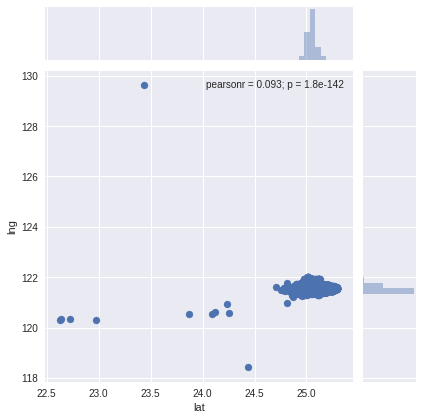

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
# sns.distplot(y, hist=True)
sns.jointplot(x="lat", y="lng", data=envdf);

In [43]:
envdf = envdf[envdf.lat>24.6]
envdf = envdf[envdf.lat<25.3]
envdf = envdf[envdf.lng<122]
envdf = envdf[envdf.lng>121]

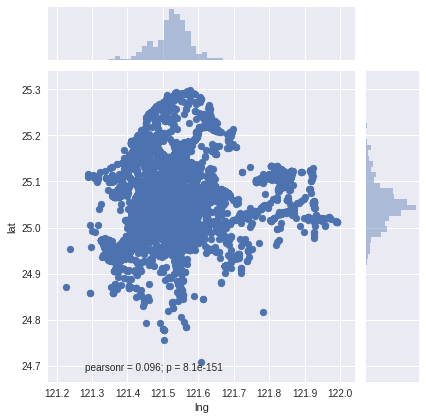

In [44]:
sns.jointplot(x="lng", y="lat", data=envdf);

In [45]:
envdf.cityID.describe()

count    73814.000000
mean       154.944726
std        176.623946
min        100.000000
25%        106.000000
50%        112.000000
75%        231.000000
max      10491.000000
Name: cityID, dtype: float64

In [46]:
import re
def idfilter(cityID):
    try:
        n = int(cityID)
        digit = n // 100
        if digit//100 < 1:
            return n
        else:
            return digit
    except:
        pass

envdf['cityID'] = envdf.cityID.map(idfilter)

In [63]:
envdf.cityID.describe()

count    73797.000000
mean       152.224589
std         60.657317
min        100.000000
50%        112.000000
95%        244.000000
max        253.000000
Name: cityID, dtype: float64

In [51]:
envdf = envdf[envdf.cityID<=253]

In [55]:
foodf = envdf[envdf.typeID==101]

In [65]:
foodf.cost.describe(percentiles=[.01,.95,.99])

count    3.448200e+04
mean     1.274349e+04
std      2.312948e+06
min      1.100000e+01
1%       2.000000e+01
50%      1.500000e+02
95%      7.050000e+02
99%      1.547190e+03
max      4.294970e+08
Name: cost, dtype: float64

In [75]:
foodf = foodf[foodf.cost<=1200]

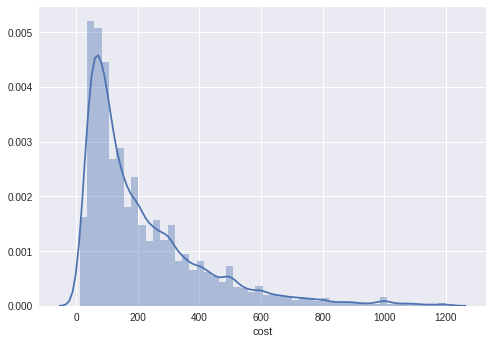

In [162]:
sns.distplot(foodf.cost)

In [97]:
foodf.shape

(33900, 6)

In [114]:
tmpdf = envdf.drop(envdf[envdf.typeID==101].index)

In [117]:
newdf = pd.concat([foodf,tmpdf], axis=0,ignore_index=True)

In [120]:
newdf.to_csv('./env_clear.csv', encoding='utf-8')

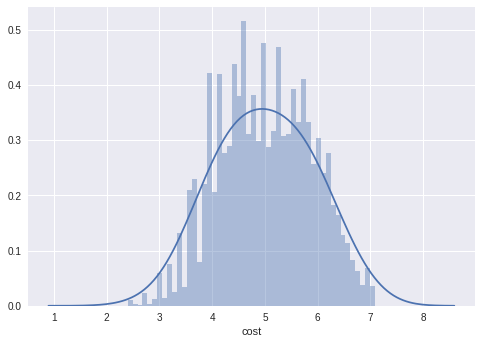

In [183]:
sns.distplot(foodf.cost.map(lambda x: np.log(x)),kde=True,kde_kws={'bw':0.5})